#### Universidade Federal de Viçosa - Campus Viçosa


**Aluno:** Erick Lima Figueiredo  **MA:** 98898

**Professor:** Hugo Neves de Oliveira **Disciplina:** INF 610

---

### Atividade Complementar 3

In [42]:
import os
import numpy as np
from PIL import Image
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Questão 1

Busca em Profundidade / DFS



In [43]:
ROOT_DIR = './drive/MyDrive/EDA/ac3_inputs'

In [44]:
# OBS: Não consegui configurar a biblioteca networkx para mostrar o grafo
# um grafo não direcionado com arestas paralelas, por isso ele possui direções.

class GraphInterpreter:
  def __init__(self, filepath) -> None:
    self.__graph = nx.DiGraph(directed=False)
    self.__vertexes = []
    self.__edges = []

    reading_vertex = True
    with open(filepath, 'r') as f:
      acc = 1
      lines = f.readlines()

      for line in lines:
        line = line.strip().lower()
        if not len(line) or '#vertices' in line:
          continue
        if '#edges' in line:
          reading_vertex = False
          continue

        if reading_vertex:
          self.__vertexes.append(line)
        else:
          edge = line.split('-')
          self.__graph.add_edge(*edge, lenth=acc)
          self.__edges.append(edge)
          acc+=1


  def get_vertexes(self) -> list[str]:
    return self.__vertexes.copy()

  def get_edges(self) -> list[tuple[str, str]]:
    return self.__edges.copy()

  def build_adjacency_list(self) -> dict[str, list[str]]:
    incidence_matrix = {}

    for v1, v2 in self.__edges:
      if v1 not in incidence_matrix:
        incidence_matrix[v1] = []
      if v2 not in incidence_matrix:
        incidence_matrix[v2] = []

      incidence_matrix[v1].append(v2)
      incidence_matrix[v2].append(v1)

    return incidence_matrix

  def build_incidence_matrix(self) -> tuple[dict[str, int], list[list[int]]]:
    mapper = self.__build_mapper()

    n_vertexes = len(self.__vertexes)
    n_edges = len(self.__edges)

    incidence_matrix = [[0 for _ in range(n_edges)] for _ in range(n_vertexes)]

    for i, (v1, v2) in enumerate(self.__edges):
      incidence_matrix[mapper[v1]][i] = 1
      incidence_matrix[mapper[v2]][i] = 1

    return mapper, incidence_matrix

  def build_adjacency_matrix(self) -> tuple[dict[str, int], list[list[int]]]:
    mapper = self.__build_mapper()

    n_vertexes = len(self.__vertexes)

    adjacency_matrix = [[0 for _ in range(n_vertexes)] for _ in range(n_vertexes)]

    for v1, v2 in self.__edges:
      adjacency_matrix[mapper[v1]][mapper[v2]] += 1
      adjacency_matrix[mapper[v2]][mapper[v1]] += 1

    return mapper, adjacency_matrix

  def show_graph(self, options: dict = {}) -> None:
    nx.draw_networkx(self.__graph, width=1, arrows = True, connectionstyle='arc3, rad = 0.1', **options)
    ax = plt.gca()
    ax.margins(0.20)
    plt.axis("off")
    plt.show()

  def __build_mapper(self) -> dict[str, int]:
    mapper = {}
    for i, v in enumerate(self.__vertexes):
      mapper[v] = i

    return mapper


In [45]:
# Abordagem recursiva com closure (para poupar passagem de parametros)

def has_cycle(graph: dict[str, list[str]]) -> bool:
  parents = {}
  visited = set()

  def dfs(v: str) -> bool:
    for neigh in graph[v]:
      if neigh not in visited:
        parents[neigh] = v
        visited.add(neigh)
        if dfs(neigh):
          return True
      elif neigh == v or parents[v] != neigh:
        return True
    return False

  for v in graph:
    if v in visited:
      continue

    parents[v] = None
    visited.add(v)

    if dfs(v):
      return True

  return False

In [46]:
# Abordagem iterativa

def has_cycle(graph: dict[str, list[str]]) -> bool:
  parents = {}
  visited = set()
  stack = []

  for v in graph:
    if v in visited:
      continue

    parents[v] = None
    visited.add(v)
    stack.append(v)

    while stack:
      v = stack.pop()

      for neigh in graph[v]:
        if neigh not in visited:
          parents[neigh] = v
          visited.add(neigh)
          stack.append(neigh)
        elif neigh == v or parents[v] != neigh:
          return True

  return False

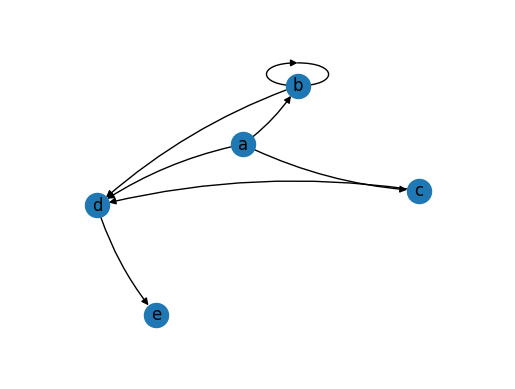

O grafo possui ciclos.


In [47]:
# Grafo 1
g1 = GraphInterpreter(os.path.join(ROOT_DIR, '1.grf'))
g1_adj_list = g1.build_adjacency_list()
g1.show_graph()

print(f'O grafo{" não" if not has_cycle(g1_adj_list) else ""} possui ciclos.')

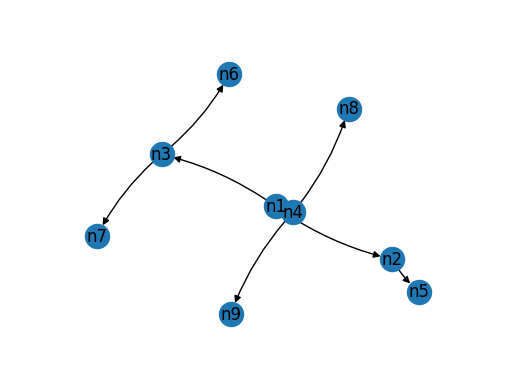

O grafo não possui ciclos.


In [48]:

# Grafo 2
g2 = GraphInterpreter(os.path.join(ROOT_DIR, '2.grf'))
g2_adj_list = g2.build_adjacency_list()
g2.show_graph()

print(f'O grafo{" não" if not has_cycle(g2_adj_list) else ""} possui ciclos.')

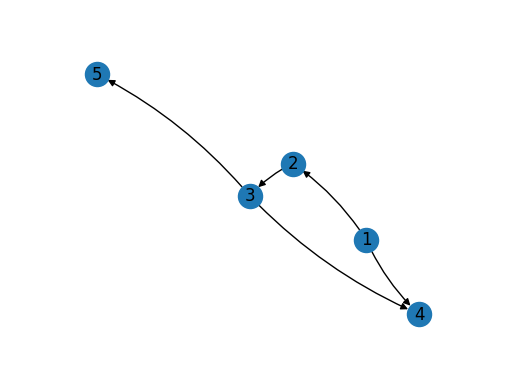

O grafo possui ciclos.


In [49]:
# Grafo 3
g3 = GraphInterpreter(os.path.join(ROOT_DIR, '3.grf'))
g3_adj_list = g3.build_adjacency_list()
g3.show_graph()

print(f'O grafo{" não" if not has_cycle(g3_adj_list) else ""} possui ciclos.')

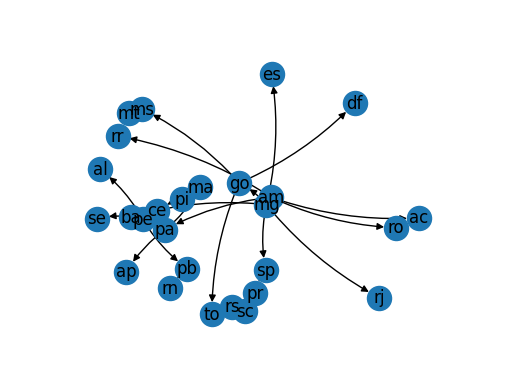

O grafo não possui ciclos.


In [50]:
# Grafo 4
g4 = GraphInterpreter(os.path.join(ROOT_DIR, '4.grf'))
g4_adj_list = g4.build_adjacency_list()
g4.show_graph()

print(f'O grafo{" não" if not has_cycle(g4_adj_list) else ""} possui ciclos.')

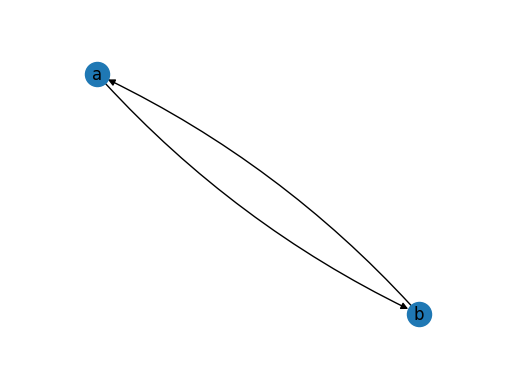

O grafo possui ciclos.


In [51]:
# Grafo 5
g5 = GraphInterpreter(os.path.join(ROOT_DIR, '5.grf'))
g5_adj_list = g5.build_adjacency_list()
g5.show_graph()

print(f'O grafo{" não" if not has_cycle(g5_adj_list) else ""} possui ciclos.')

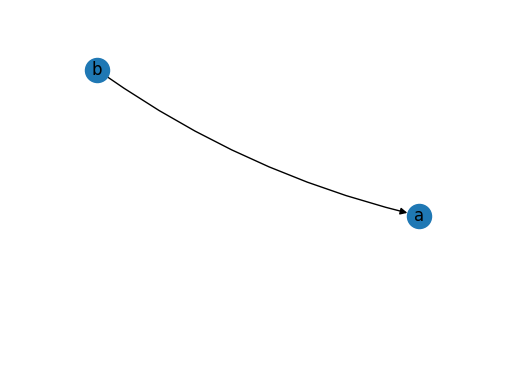

O grafo não possui ciclos.


In [52]:
# Grafo 6
g6 = GraphInterpreter(os.path.join(ROOT_DIR, '6.grf'))
g6_adj_list = g6.build_adjacency_list()
g6.show_graph()

print(f'O grafo{" não" if not has_cycle(g6_adj_list) else ""} possui ciclos.')

### Questão 2

Busca em Largura / BFS

Pseudo-código do algoritmo de Esqueletização:

```
Função transitions(neighbours):
    n = neighbours + neighbours[0:1]
    Retorna soma((n1, n2) == (0, 1) para n1, n2 em zip(n, n[1:]))

Função get_neighbors(image, x, y):
    neighs = []
    Para cada dx, dy em MOVES:
        Se 0 <= x + dx < dimensão_horizontal_da_imagem e 0 <= y + dy < dimensão_vertical_da_imagem:
            neighs.append((x + dx, y + dy))
    Retorna neighs

Função condition_1(img, neighs):
    P2, P3, P4, P5, P6, P7, P8, P9 = n = list(
        map(lambda m: valor_do_pixel_na_imagem[m[0]][m[1]], neighs))
    Se (2 <= soma(n) <= 6 e transitions(n) == 1 e P2 * P4 * P6 == 0 e P4 * P6 * P8 == 0):
        Retorna Verdadeiro
    Senão:
        Retorna Falso

Função condition_2(img, neighs):
    P2, P3, P4, P5, P6, P7, P8, P9 = n = list(
        map(lambda m: valor_do_pixel_na_imagem[m[0]][m[1]], neighs))
    Se (2 <= soma(n) <= 6 e transitions(n) == 1 e P2 * P4 * P8 == 0 e P2 * P6 * P8 == 0):
        Retorna Verdadeiro
    Senão:
        Retorna Falso

Função bfs(image, check_conditions) -> lista:
    visitados = conjunto()
    fila = []
    para cada j no intervalo(dimensão_vertical_da_imagem):
        fila.append((0, j))
        fila.append((dimensão_horizontal_da_imagem - 1, j))
        visitados.add((0, j))
        visitados.add((dimensão_horizontal_da_imagem - 1, j))

    para cada i no intervalo(dimensão_horizontal_da_imagem):
        fila.append((i, 0))
        fila.append((i, dimensão_vertical_da_imagem - 1))
        visitados.add((i, 0))
        visitados.add((i, dimensão_vertical_da_imagem - 1))

    enquanto o comprimento de fila for maior que zero:
        x, y = fila.pop(0)
        vizinhos = get_neighbors(image, x, y)
        para cada nx, ny em vizinhos:
            se (nx, ny) não estiver em visitados:
                visitados.add((nx, ny))
                fila.append((nx, ny))

        se valor_do_pixel_na_imagem[x][y] for verdadeiro e o comprimento de vizinhos for igual a 8 e check_conditions(image, vizinhos) for Verdadeiro:
            para_deletar.append((x, y))

    Retorna para_deletar

Função skeletonization(image):
    imagem_copia = cópia de image
    mudado = Verdadeiro
    contador = 1

    enquanto mudado for Verdadeiro:
        mudado = Falso
        para_deletar = bfs(imagem_copia, condition_1)
        se o comprimento de para_deletar for maior que zero:
            mudado = Verdadeiro
            para cada x, y em para_deletar:
                imagem_copia[x][y] = 0

        para_deletar = bfs(imagem_copia, condition_2)
        se o comprimento de para_deletar for maior que zero:
            mudado = Verdadeiro
            para cada x, y em para_deletar:
                imagem_copia[x][y] = 0

    Retorna imagem_copia
```

Operação básica: A operação básica do algoritmo de esqueletização é a varredura de todos os pixels da imagem. Essa varredura ocorre dentro da função de BFS que é invocada duas vezes a cada iteração no loop principal, em outras palavras podemos considerar a BFS como sendo a operação básica do algoritmo.

Ordem de complexidade: A operação básica da busca em largura está na visitação de todos os pixels da imagem. Portanto a ordem de complexidade desse algoritmo se dá como $X * 2 * O(w*h)$, sendo $X$ o número de vezes que o loop principal é executado (varia de acordo com as características da imagem), $2$ o número de vezes que a busca é invocada no loop principal, $w$ o comprimento e $h$ a altura da imagem, simplificando teremos $X * 2 * O(w*h) \equiv O(w*h)$.

---

Implementação:


In [53]:
MOVES = [(-1, 0), (-1, 1), (0, 1), (1, 1),
         (1, 0), (1, -1), (0, -1), (-1, -1)]

In [54]:
def image_to_binary(image_path):
    img = Image.open(image_path).convert("L")
    threshold = 128
    img_binary = img.point(lambda p: p > threshold and 1)
    return np.asarray(img_binary)

In [55]:
def connections(neighbours):
    n = neighbours + neighbours[0:1]
    return sum((n1, n2) == (0, 1) for n1, n2 in zip(n, n[1:]))

In [56]:
def get_neighbors(image, x, y):
    neighs = []
    for dx, dy in MOVES:
        if 0 <= x + dx < image.shape[0] and 0 <= y + dy < image.shape[1]:
            neighs.append((x + dx, y + dy))

    return neighs

In [57]:
def condition_1(img, neighs):
    P2, P3, P4, P5, P6, P7, P8, P9 = n = list(
        map(lambda m: img[m[0]][m[1]], neighs))
    if (2 <= sum(n) <= 6 and
            connections(n) == 1 and
            P2 * P4 * P6 == 0 and
            P4 * P6 * P8 == 0):
        return True

    return False

In [58]:
def condition_2(img, neighs):
    P2, P3, P4, P5, P6, P7, P8, P9 = n = list(
        map(lambda m: img[m[0]][m[1]], neighs))
    if (2 <= sum(n) <= 6 and
            connections(n) == 1 and
            P2 * P4 * P8 == 0 and
            P2 * P6 * P8 == 0):
        return True

    return False

In [59]:
def bfs(image, check_conditions) -> list:
    visited = set()
    queue = []
    to_delete = []

    for j in range(image.shape[1]):
        queue.append((0, j))
        queue.append((image.shape[0] - 1, j))

        visited.add((0, j))
        visited.add((image.shape[0] - 1, j))

    for i in range(image.shape[0]):
        queue.append((i, 0))
        queue.append((i, image.shape[1] - 1))

        visited.add((i, 0))
        visited.add((i, image.shape[1] - 1))

    while len(queue):
        x, y = queue.pop(0)
        neighs = get_neighbors(image, x, y)

        for nx, ny in neighs:
            if (nx, ny) not in visited:
                visited.add((nx, ny))
                queue.append((nx, ny))

        if image[x][y] and len(neighs) == 8 and check_conditions(image, neighs):
            to_delete.append((x, y))

    return to_delete

In [60]:
def skeletonization(image):
    image_copy = image.copy()
    changed = True
    #acc = 1
    while changed:
        #print(acc)
        #acc+=1
        changed = False

        to_delete = bfs(image_copy, condition_1)
        if len(to_delete):
            changed = True
            for x, y in to_delete:
                image_copy[x][y] = 0

        to_delete = bfs(image_copy, condition_2)
        if len(to_delete):
            changed = True
            for x, y in to_delete:
                image_copy[x][y] = 0

    return image_copy

In [61]:
def display_image_grid(directory, title):
    files = os.listdir(directory)
    images = [file for file in files if file.endswith(".jpg") or file.endswith(".png")]
    num_images = len(images)
    rows = 2
    columns = (num_images + 1) // rows
    plt.figure(figsize=(15, 6))
    plt.suptitle(title)
    for i, image in enumerate(images):
        plt.subplot(rows, columns, i + 1)
        img = mpimg.imread(os.path.join(directory, image))
        plt.imshow(img)
        plt.axis('off')
    plt.show()


Exibindo as imagens originais no diretório:


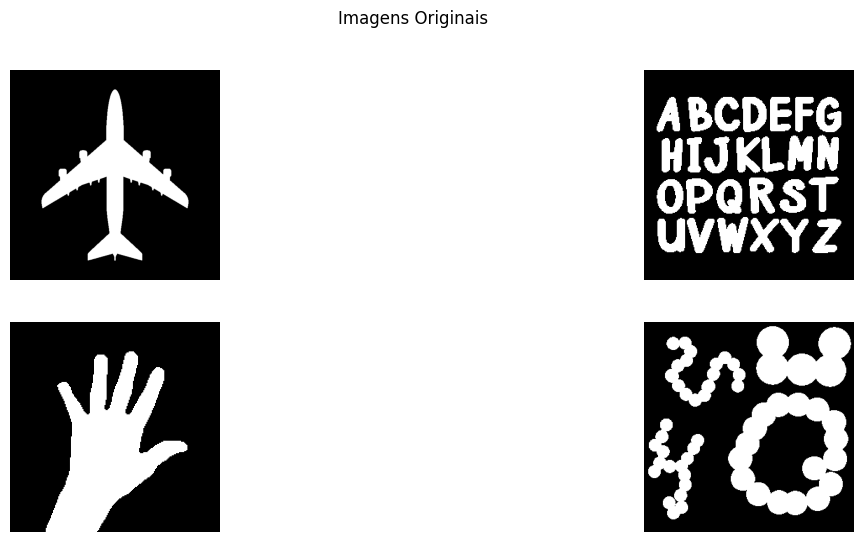

In [62]:
IMGS_ROOT_DIR = './drive/MyDrive/EDA/ac3_inputs/images'
display_image_grid(IMGS_ROOT_DIR, 'Imagens Originais')

In [66]:
for img in [f for f in os.listdir(IMGS_ROOT_DIR) if f.endswith('.png')]:
  print('Esqueletizando', img)
  img_path = os.path.join(IMGS_ROOT_DIR, img)
  res = skeletonization(image_to_binary(img_path))

  pil_image = Image.fromarray(np.uint8(res) * 255)
  pil_image.save(os.path.join(IMGS_ROOT_DIR, 'results', img))



Esqueletizando airplane.png
Esqueletizando letters.png
Esqueletizando hand.png
Esqueletizando blobs.png


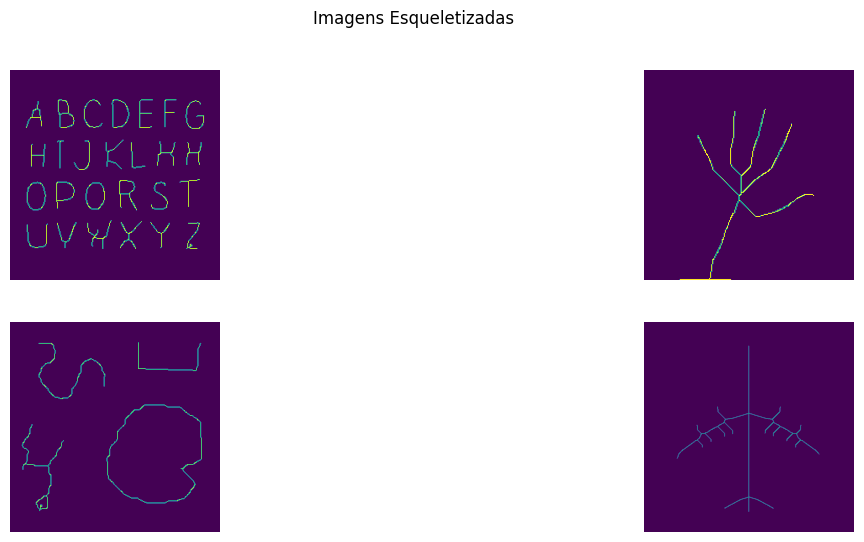

In [68]:
display_image_grid(os.path.join(IMGS_ROOT_DIR, 'results'), 'Imagens Esqueletizadas')